/var/folders/9d/91392f990_s6q5jtqnwhg2s00000gn/T/ipykernel_6673/1221455418.py:39: RuntimeWarning: divide by zero encountered in power
  z = (np.sin(np.pi * th / n)) ** (-2)


(-1.1, 1.1, -1.1, 1.1)

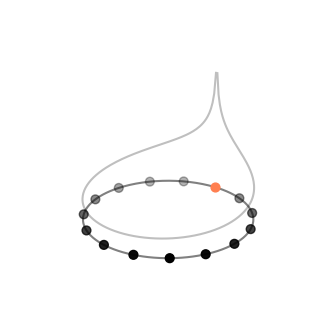

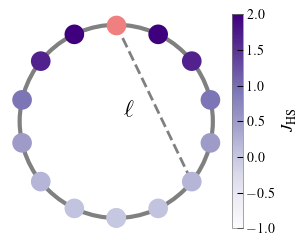

In [6]:
import matplotlib.pyplot as plt
from matplotlib import patches, colors
import numpy as np
from mpl_toolkits import mplot3d

norm = colors.Normalize(vmin=-1, vmax=2)
# %%
r = 1
n = 15
th = np.arange(0, n) 
x = r * np.cos(2 * np.pi * th / n )#+ np.pi / 2)
y = r * np.sin(2 * np.pi * th / n)# + np.pi / 2)

t = np.linspace(0.01, 2*np.pi - 0.01, 300)
# z = (np.sin(np.pi * th / n)) ** (-2)
z = 10 * np.log((np.sin(t/2)) ** (-2))
z[z == np.inf] = np.nan

fig = plt.figure()
ax = plt.axes(projection='3d')
yshift = 20
ax.plot(np.cos(t), np.sin(t), - yshift * np.ones(len(t)), color='gray')
ax.plot(np.cos(t), np.sin(t), z, color='black', alpha=0.25)
ax.scatter3D(x[1:], y[1:], - yshift * np.ones(len(x))[1:], color='black', s=40)
ax.scatter3D(x[0], y[0], - yshift * np.ones(len(x))[0], color='coral', s=40)


ax.grid(False)
# ax.xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.set_axis_off()
ax.view_init(25, -145)
# plt.savefig('hs-hamiltonian.pdf')
# plt.show()

r = 1
n = 14
th = np.arange(-n / 2, n / 2 + 1) 
th_cont = np.linspace(-n / 2, n / 2, 100)
z = (np.sin(np.pi * th / n)) ** (-2)
z_cont = (np.sin(np.pi * th_cont / n)) ** (-2)
x = r * np.cos(2 * np.pi * th / n + np.pi / 2)
y = r * np.sin(2 * np.pi * th / n + np.pi / 2)
z[z == np.inf] = np.nan

# print(np.log(z))

marker_size = 200
edgecolor = 'black'
lw = 0
circle1 = patches.Circle((0, 0), radius=1, fill=False, linewidth=3, edgecolor='gray')
fig, ax = plt.subplots(figsize=(3,3))
ax.add_patch(circle1)
sc = ax.scatter(x, y, c=np.log(z), s=marker_size, cmap='Purples', 
	norm=norm, edgecolors=edgecolor, linewidth=lw)
ax.scatter([0], [1], s=marker_size, color='lightcoral', 
	edgecolors=edgecolor, linewidth=lw)

plt.plot([0, x[2]], [1, y[2]], color='gray', linestyle='--', linewidth=2, zorder=0)
plt.text(0.085, 0.05, r'$\ell$', fontsize='xx-large')


# ax.set_ylim(0, 30)
ax.set_xlabel('$i - j$')
cbar = plt.colorbar(sc, fraction=0.046, pad=0.04)
cbar.set_label('$J_\mathrm{HS}$')
# cbar.set_ticks([-1, 2])
ax.set_aspect('equal')
plt.axis('off')

In [7]:

fname = "../drafts/hs-top-view-v0"

fig.savefig(fname + ".pdf")
fig.savefig(fname + ".png")